#**SPRINT 2**

Team ID: PNT2022TMID22022

#Importing required Libraries

In [1]:
import numpy
import tensorflow

In [2]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [3]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras


In [4]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

#Loading dataset

Dataset is available in tensorflow dataset repository

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Training Dataset has 60000 images & testing has 10000 images

In [7]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


#  Analyze the data

In [8]:

x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
y_train[3]

1

In [11]:
import matplotlib.pyplot as plt

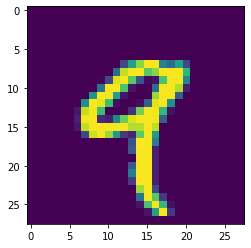

In [12]:
plt.imshow(x_train[4])

#Reshaping the data

As we are using Deep learning neural network, the input for this network to get trained on should be of higher dimensional. Our dataset is having three-dimensional images so we have to reshape them too higher dimensions

In [13]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

#Applying one hot encoding

One hot encoding to convert numerical values to classes where 0 to 9 are 10 seperate classes if value is 5 class 5 is 1 else 0

In [14]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [15]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#Creating the model

In [16]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

#Compile the model

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#Train the model

In [18]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.2067 - accuracy: 0.9514 - val_loss: 0.0854 - val_accuracy: 0.9736
Epoch 2/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0729 - accuracy: 0.9780 - val_loss: 0.0827 - val_accuracy: 0.9755
Epoch 3/5
1875/1875 [==============================] - 190s 102ms/step - loss: 0.0503 - accuracy: 0.9841 - val_loss: 0.0834 - val_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0911 - val_accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.1072 - val_accuracy: 0.9743


#metrics are noticed

In [19]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.10718905925750732, 0.9743000268936157]


#Test the model

In [20]:
prediction=model.predict(x_test[:5])
print(prediction)

1/1 [==============================] - 0s 95ms/step
[[2.3984072e-12 8.2249497e-18 2.5674106e-07 4.3811013e-08 3.6600208e-17
  5.9920649e-14 9.4399419e-21 9.9999976e-01 5.6308075e-10 5.8142757e-12]
 [2.8003658e-08 7.8760904e-06 9.9999189e-01 3.5861483e-10 6.7744681e-13
  3.1280996e-16 1.7902997e-07 3.6837059e-17 9.4017603e-09 6.3471824e-14]
 [3.1235996e-07 9.7864693e-01 1.0814518e-04 3.0945338e-07 2.0346556e-02
  2.0934401e-04 8.7039996e-05 1.9101551e-06 5.9947156e-04 1.3876568e-08]
 [9.9999964e-01 3.7812548e-13 9.6502546e-08 1.3516953e-10 3.9759778e-13
  2.3215474e-10 1.5402920e-08 6.0580927e-15 1.0704141e-09 2.5465903e-07]
 [2.6469000e-14 2.6259485e-16 8.3910122e-11 9.9937040e-13 1.0000000e+00
  5.4162161e-12 7.6958323e-17 5.9262986e-15 1.9667700e-13 7.1877376e-10]]


In [21]:
import numpy as np

In [22]:
print(np.argmax(prediction,axis=1))

[7 2 1 0 4]


In [23]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#model saving

In [24]:
model.save('models/mnistcnn.h5')

#Test the saved model

inputs loaded from mnist

In [ ]:
print('X_train:' +str(x_train.shape))
print('y_train:' +str(y_train.shape))
print('X_test:' +str(x_test.shape))
print('y_test:' +str(y_test.shape))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(x_train[i], cmap = pyplot.get_cmap('gray'))
  pyplot.imshow(x_train[i], cmap = 'gray', vmin=0, vmax=255)
  pyplot.show()

ouput predicted from saved model

inputs as hown are 5,0,4,1,9,2,1,3,1

In [26]:
from tensorflow.keras.models import load_model
model=load_model('models/mnistcnn.h5')
from PIL import Image
for index in range(9):
  img=x_train[index].reshape((28,28))
  imgarray=np.array(img)
  imgarray=imgarray.reshape(1,28,28,1)
  y_pred=model.predict(imgarray)
  print(np.argmax(y_pred))

1/1 [==============================] - 0s 64ms/step
5
1/1 [==============================] - 0s 24ms/step
0
1/1 [==============================] - 0s 20ms/step
4
1/1 [==============================] - 0s 20ms/step
1
1/1 [==============================] - 0s 27ms/step
9
1/1 [==============================] - 0s 21ms/step
2
1/1 [==============================] - 0s 25ms/step
1
1/1 [==============================] - 0s 25ms/step
3
1/1 [==============================] - 0s 22ms/step
1
